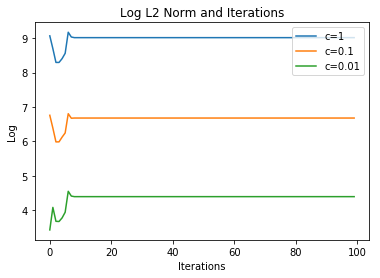

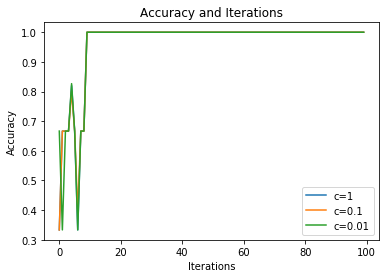

In [16]:
import pandas
import numpy as np

data = pandas.read_csv( 'Fisher.csv' )
m = data.as_matrix()
labels = m[:,0]
labels[ labels==2 ] = 1  # squash class 2 into class 1
labels = np.atleast_2d( labels ).T
features = m[:,1:5]

temp = np.vstack([np.ones(features.shape[0]), features.T])
features = temp.T

c1 = 1
c2 = 0.1
c3 = 0.01

w1 = np.random.randn(1,features.shape[1])
w2 = np.random.randn(1,features.shape[1])
w3 = np.random.randn(1,features.shape[1])


ln1 = []
ln2 = []
ln3 = []

a1 = []
a2 = []
a3 = []

iterations = 100

for k in range(iterations):
    
    y1 = np.sign(w1.dot(features.T))
    y1 = [0 if v < 0 else v for v in y1[0]]
    y1 = np.array(y1).reshape((features.shape[0],1))

    y2 = np.sign(w2.dot(features.T))
    y2 = [0 if v < 0 else v for v in y2[0]]
    y2 = np.array(y2).reshape((features.shape[0],1))

    y3 = np.sign(w3.dot(features.T))
    y3 = [0 if v < 0 else v for v in y3[0]]
    y3 = np.array(y3).reshape((features.shape[0],1))
    
    for j in range(features.shape[0]):
   
        w1 += c1*(labels[j]-y1[j])*features[j]
        w2 += c2*(labels[j]-y2[j])*features[j]
        w3 += c3*(labels[j]-y3[j])*features[j]
    
    a1.append(np.mean(np.equal(labels, y1).astype(float)))
    a2.append(np.mean(np.equal(labels, y2).astype(float)))
    a3.append(np.mean(np.equal(labels, y3).astype(float)))

#     print np.dot((labels-y),np.transpose(labels-y))
    ln1.append(np.log(np.sqrt(w1.dot(w1.T)[0])))
    ln2.append(np.log(np.sqrt(w2.dot(w2.T)[0])))
    ln3.append(np.log(np.sqrt(w3.dot(w3.T)[0])))
#     print np.log(1.0*ln/5)
    

import matplotlib.pyplot as plt
%matplotlib inline
 
plt.figure(1)
one = plt.plot(range(iterations),ln1, label='c=1')
two = plt.plot(range(iterations),ln2, label='c=0.1')
three = plt.plot(range(iterations),ln3, label='c=0.01')
plt.legend()
plt.title('Log L2 Norm and Iterations')

plt.xlabel('Iterations')
plt.ylabel('Log')

plt.show()

plt.figure(2)
one = plt.plot(range(iterations),a1, label='c=1')
two = plt.plot(range(iterations),a2, label='c=0.1')
three = plt.plot(range(iterations),a3, label='c=0.01')
plt.legend()
plt.title('Accuracy and Iterations')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')

plt.show()

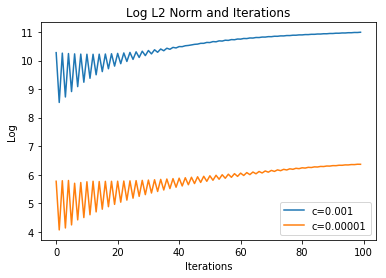

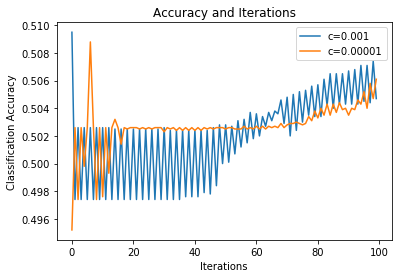

In [4]:
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1

temp = np.vstack([np.ones(features.shape[0]), features.T])
features = temp.T

c1 = 0.001
c2 = 0.00001


w1 = np.random.randn(1,features.shape[1])
w2 = np.random.randn(1,features.shape[1])

ln1 = []
ln2 = []

a1 = []
a2 = []

iterations = 100

for _ in range(iterations):
    
    y1 = np.sign(w1.dot(features.T))
    y1 = [0 if v < 0 else v for v in y1[0]]
    y1 = np.array(y1).reshape((features.shape[0],1))

    y2 = np.sign(w2.dot(features.T))
    y2 = [0 if v < 0 else v for v in y2[0]]
    y2 = np.array(y2).reshape((features.shape[0],1))
    
    for j in range(features.shape[0]):
    

        w1 += c1*(labels[j]-y1[j])*features[j]
        w2 += c2*(labels[j]-y2[j])*features[j]
    
    a1.append(np.mean(np.equal(labels, y1).astype(float)))
    a2.append(np.mean(np.equal(labels, y2).astype(float)))

    ln1.append(np.log(np.sqrt(w1.dot(w1.T)[0])))
    ln2.append(np.log(np.sqrt(w2.dot(w2.T)[0])))
    
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.figure(1)
one = plt.plot(range(iterations),ln1, label='c=0.001')
two = plt.plot(range(iterations),ln2, label='c=0.00001')
plt.legend()
plt.title('Log L2 Norm and Iterations')

plt.xlabel('Iterations')
plt.ylabel('Log')

plt.show()

plt.figure(2)
one = plt.plot(range(iterations),a1, label='c=0.001')
two = plt.plot(range(iterations),a2, label='c=0.00001')

plt.legend()
plt.title('Accuracy and Iterations')

plt.xlabel('Iterations')
plt.ylabel('Classification Accuracy')

plt.show()
    